In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
plot_folder = op.join(bids_folder, 'plots_and_ims', 'behavior_magjudge')

sns.set_context('talk')


In [2]:
from utils import get_data

df= get_data(bids_folder,  include_var=['group', 'age'])
df['group'] = np.where(df['group'] == 0, 'control', 'dyscalc')

print(len(df.index.unique('subject')))

number of subjects found: 66
number of subjects in dataframe: 66
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64', name='subject')
66


In [3]:
df.head()

rt    n1    n2  choice  chose_n2      frac  \
subject run trial_nr                                                     
13      1   1         1.940046  14.0  11.0   False     False  0.785714   
            2         1.088813  14.0  15.0    True      True  1.071429   
            3         1.187995   7.0   8.0    True      True  1.142857   
            4         1.805343  14.0  10.0   False     False  0.714286   
            5         1.788309  10.0   6.0   False     False  0.600000   

                      log(n2/n1)   log(n1)  group  
subject run trial_nr                               
13      1   1          -0.241162  2.639057      1  
            2           0.068993  2.639057      1  
            3           0.133531  1.945910      1  
            4          -0.336472  2.639057      1  
            5          -0.510826  2.302585      1

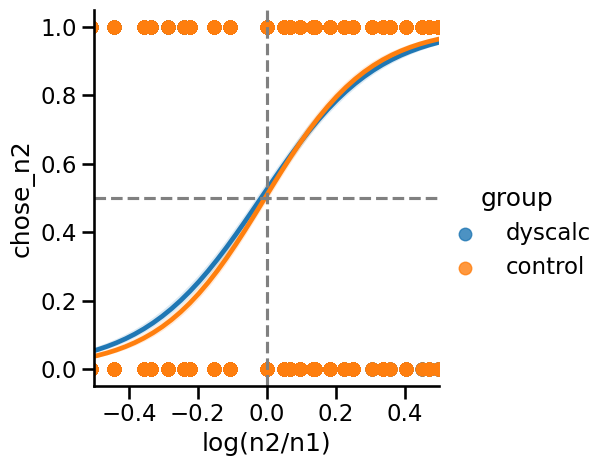

In [49]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',ci=95, logistic=True) #  col='age',

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim([-.5,.5])


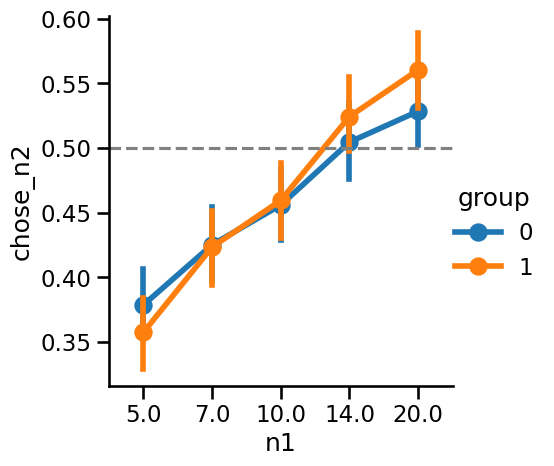

In [23]:
x_var = 'n1'

fig = sns.catplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',kind='point')
plt.axhline(y=0.5,color='grey', ls='--')

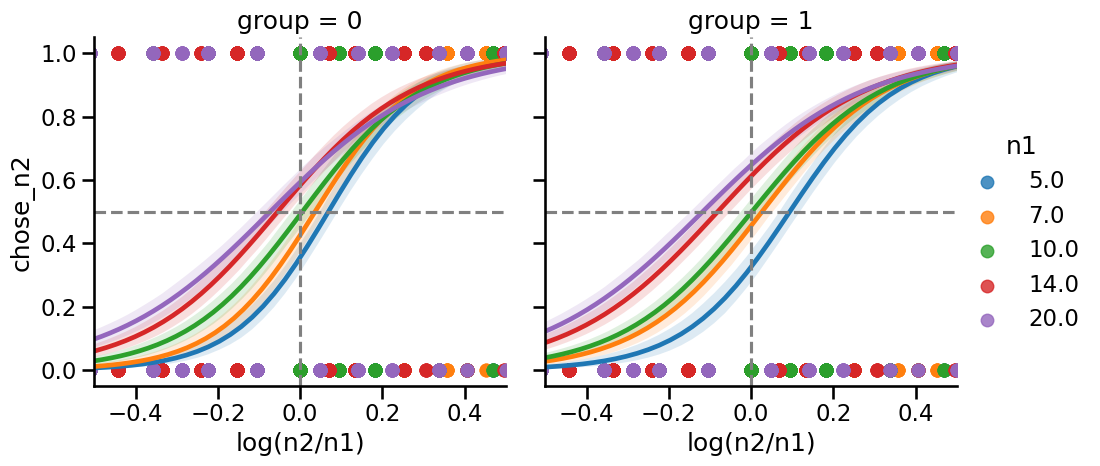

In [7]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue= 'n1', col='group',ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim(-.5,.5)

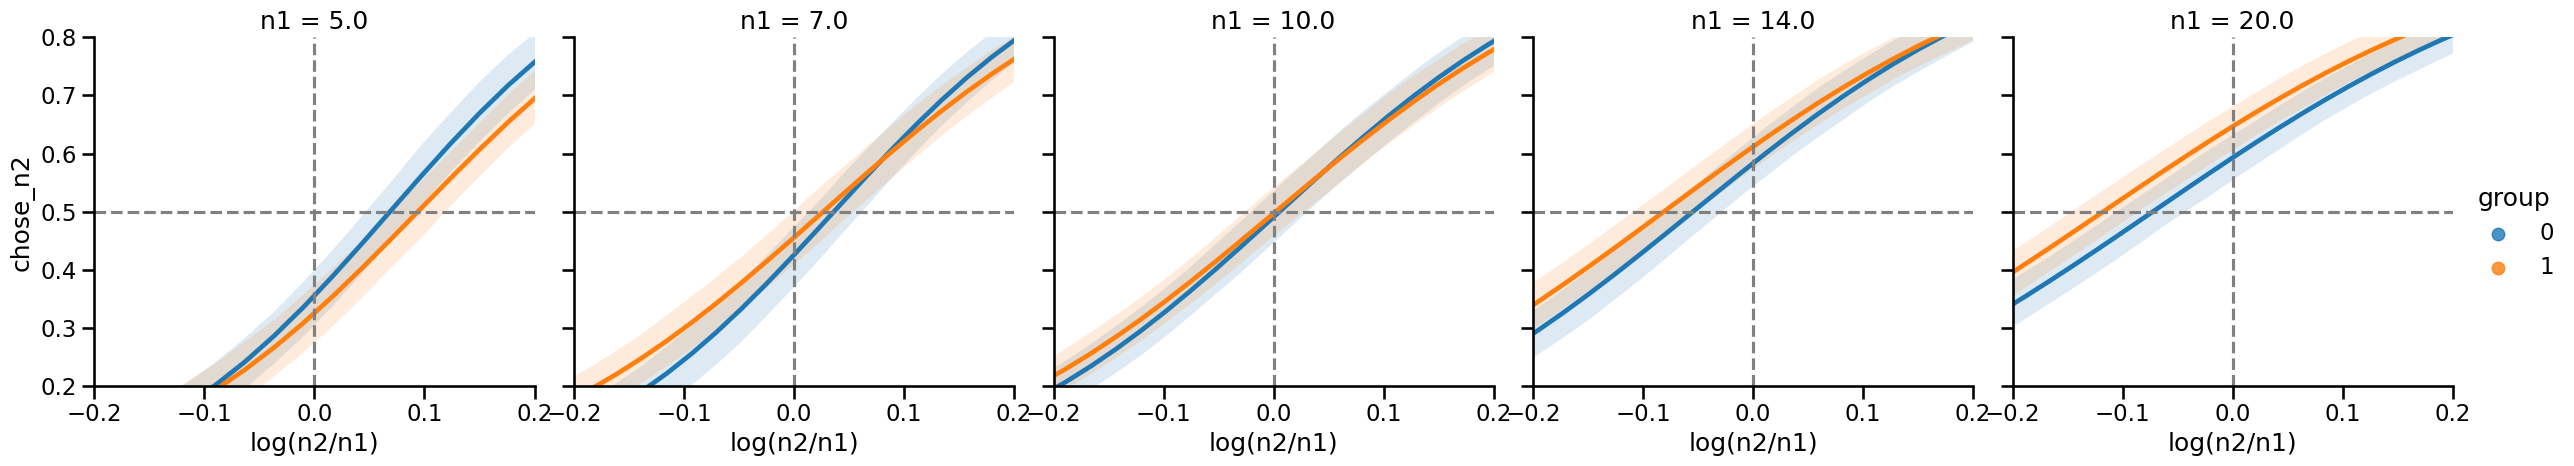

In [22]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',col = 'n1', ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim(-.2,.2)
    ax.set_ylim(0.2,0.8)

### get subwise psychometric curves & save plots

In [18]:
# get subwise psychometric curves & save plots

# Ignore overflow RuntimeWarnings
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

x_var = 'log(n2/n1)'

for i, group in enumerate(['control','dyscalculic']):
    tmp = df[df['group']==i]
    fig = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_n2',col = 'subject', ci=95,  logistic=True, col_wrap=5) #  hue='group',

    for ax in fig.axes.flat:
        ax.axvline(x=0,color='grey', ls='--')
        ax.axhline(y=0.5,color='grey', ls='--')
        ax.set_xlim(-0.8,.8)
    fig.fig.suptitle(group, fontsize=20)
    plt.savefig(op.join(plot_folder, f'psymetCurves_{group}.pdf'))
    plt.close()

In [8]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

x_var = 'log(n2/n1)'
hue = 'n1'

for group in df['group'].unique(): 
    tmp = df[df['group']==group]
    fig = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_n2',col = 'subject', hue=hue,  ci=95,  logistic=True, col_wrap=5) #  hue='group',

    for ax in fig.axes.flat:
        ax.axvline(x=0,color='grey', ls='--')
        ax.axhline(y=0.5,color='grey', ls='--')
        ax.set_xlim(-0.8,.8)
    fig.fig.suptitle(group, fontsize=20)
    plt.savefig(op.join(plot_folder, f'psymetCurves_hue-{hue}_{group}.pdf'))
    plt.close()

#

## Accuracy

In [3]:
df['correct_answer_n2'] = np.where((df['n2'] > df['n1']), True, False)
df['correct'] = np.where((df['correct_answer_n2'] == df['chose_n2']), True, False)


p-value for n1=5.0: 0.732
p-value for n1=7.0: 0.113
p-value for n1=10.0: 0.079
p-value for n1=14.0: 0.301
p-value for n1=20.0: 0.525


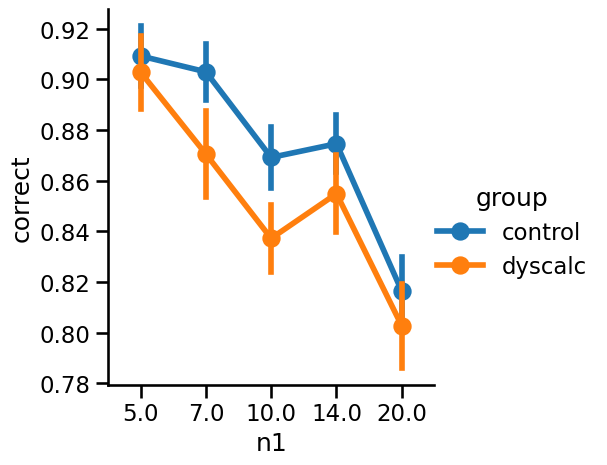

In [37]:
tmp = df.groupby(['subject', 'group','n1'])['correct'].mean()
sns.catplot(tmp.reset_index(), y='correct', x='n1',hue='group',kind='point',errorbar='se')

import pingouin as pg

temp = df.groupby(['subject', 'group','n1'])['correct'].mean().to_frame()

for n1 in temp.index.get_level_values('n1').unique():
    ttest = pg.ttest(temp.loc[(slice(None), 'control', n1), 'correct'], temp.loc[(slice(None), 'dyscalc', n1), 'correct'])
    p_val = np.round(ttest['p-val'].values[0],3)
    print(f'p-value for n1={n1}: {p_val}')


Text(0.5, 1.0, 'p=0.176')

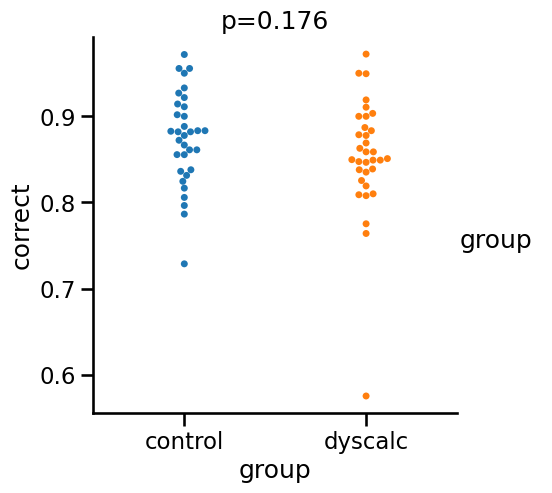

In [51]:
import pingouin as pg

temp = df.groupby(['subject', 'group',])['correct'].mean().reset_index()

ttest = pg.ttest(temp.loc[temp['group']=='control', 'correct'], temp.loc[temp['group']=='dyscalc', 'correct'])
p_val = np.round(ttest['p-val'].values[0],3)   
sns.catplot(temp.reset_index(), y='correct', x='group', hue='group', kind='swarm',errorbar=('ci', 95)) #x='n1',
plt.title(f'p={p_val}')

<Axes: xlabel='age', ylabel='correct'>

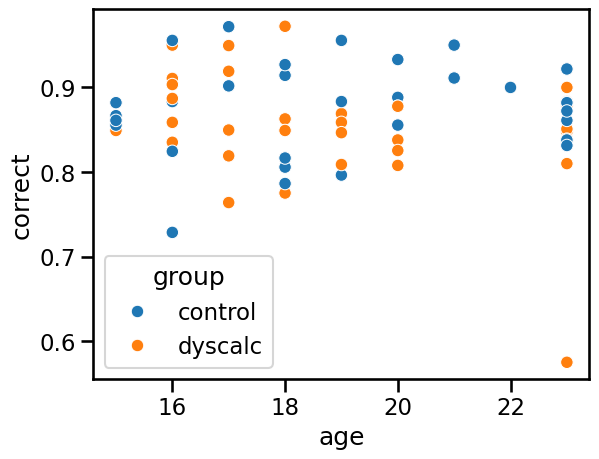

In [7]:
tmp = df.groupby(['subject', 'group','age'])['correct'].mean()
sns.scatterplot(tmp.reset_index(), y='correct', x='age',hue='group') # ,kind='scatter'

Text(0.5, 1.0, 'p=0.06')

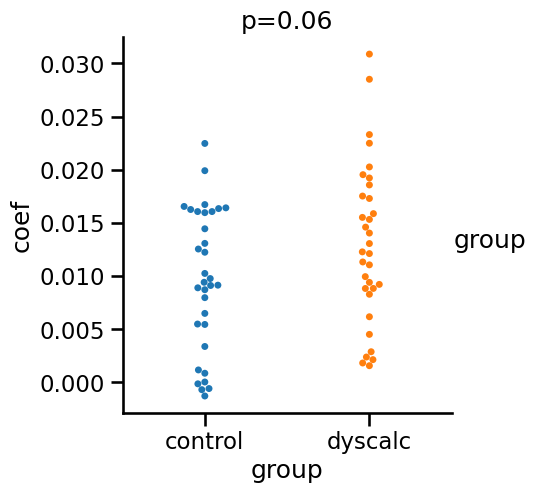